# This is my project to analyze F1 qualifications from 2006 to 2020


Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('qualifying_times_2006-2020.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Position,Driver No.,Venue,Name,NameTag,Team,Q1,Q2,Q3,Laps
0,0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,1:33.310,1:32.025,1:31.431,20
1,1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,1:33.579,1:32.014,1:31.478,20
2,2,2006,3,12,bahrain,Jenson Button,BUT,Honda,1:32.603,1:32.025,1:31.549,23
3,3,2006,4,1,bahrain,Fernando Alonso,ALO,Renault,1:32.433,1:31.215,1:31.702,20
4,4,2006,5,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,1:33.233,1:31.487,1:32.164,20


Now, let's clean the data. We don't need the Driver No., NameTag, and number of laps.

In [4]:
df = df.drop(df.columns[0], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        6089 non-null   int64 
 1   Position    6089 non-null   object
 2   Driver No.  6089 non-null   int64 
 3   Venue       6089 non-null   object
 4   Name        6089 non-null   object
 5   NameTag     6089 non-null   object
 6   Team        6089 non-null   object
 7   Q1          6084 non-null   object
 8   Q2          4442 non-null   object
 9   Q3          2810 non-null   object
 10  Laps        6089 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 523.4+ KB


In [6]:
df = df.drop(['Driver No.', 'NameTag', 'Laps'], axis = 1)

In [7]:
df.head()

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
0,2006,1,bahrain,Michael Schumacher,Ferrari,1:33.310,1:32.025,1:31.431
1,2006,2,bahrain,Felipe Massa,Ferrari,1:33.579,1:32.014,1:31.478
2,2006,3,bahrain,Jenson Button,Honda,1:32.603,1:32.025,1:31.549
3,2006,4,bahrain,Fernando Alonso,Renault,1:32.433,1:31.215,1:31.702
4,2006,5,bahrain,Juan Pablo Montoya,McLaren Mercedes,1:33.233,1:31.487,1:32.164


We want to focus on winners.

In [8]:
winners = df[df['Position'] == '1']

In [9]:
winners.head()

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
0,2006,1,bahrain,Michael Schumacher,Ferrari,1:33.310,1:32.025,1:31.431
22,2006,1,malaysia,Giancarlo Fisichella,Renault,1:35.488,1:33.623,1:33.840
44,2006,1,australia,Jenson Button,Honda,1:28.081,1:26.337,1:25.229
66,2006,1,san-marino,Michael Schumacher,Ferrari,1:24.598,1:22.579,1:22.795
88,2006,1,europe,Fernando Alonso,Renault,1:31.138,1:30.336,1:29.819


In [10]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 6069
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      285 non-null    int64 
 1   Position  285 non-null    object
 2   Venue     285 non-null    object
 3   Name      285 non-null    object
 4   Team      285 non-null    object
 5   Q1        285 non-null    object
 6   Q2        285 non-null    object
 7   Q3        284 non-null    object
dtypes: int64(1), object(7)
memory usage: 20.0+ KB


Check wins by teams

In [11]:
winners['Team'].value_counts()

Mercedes                     119
Ferrari                       48
Red Bull Racing Renault       36
McLaren Mercedes              33
RBR Renault                   20
Renault                        8
Brawn Mercedes                 5
Red Bull Racing Honda          4
Red Bull Racing TAG Heuer      3
Williams Mercedes              1
Williams Renault               1
Force India Mercedes           1
Williams Cosworth              1
Toyota                         1
STR Ferrari                    1
Sauber BMW                     1
Honda                          1
Racing Point BWT Mercedes      1
Name: Team, dtype: int64

We can see some unusual names. That is because teams over the years have had different names and sponsors. Let's create a more efficient data frame

In [12]:
winners['Team'] = winners['Team'].str.replace(r'^(Red|RBR).*$', 'Red Bull', regex=True)
winners['Team'] = winners['Team'].str.replace(r'^.*Ferrari.*$', 'Ferrari', regex=True)
winners['Team'] = winners['Team'].str.replace(r'^Williams.*$', 'Williams', regex=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_37468\3082950587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['Team'] = winners['Team'].str.replace(r'^(Red|RBR).*$', 'Red Bull', regex=True)
C:\Users\szymo\AppData\Local\Temp\ipykernel_37468\3082950587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['Team'] = winners['Team'].str.replace(r'^.*Ferrari.*$', 'Ferrari', regex=True)
C:\Users\szymo\AppData\Local\Temp\ipykernel_37468\3082950587.py:3: SettingWithCopyWarning: 
A value is trying t

In [13]:
#update Kimi surname
winners['Name'] = winners['Name'].str.replace(r'^Kimi R.*$', 'Kimi Raikkonen', regex=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_37468\1612758033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['Name'] = winners['Name'].str.replace(r'^Kimi R.*$', 'Kimi Raikkonen', regex=True)


In [14]:
color_map = {
    'McLaren Mercedes': 'silver',
    'Mercedes': 'black',
    'Red Bull': 'blue',
    'Ferrari': 'red',
    'Renault': 'yellow',
    'Brawn Mercedes': 'lightyellow',
    'Williams': 'deepskyblue',
    'Honda': 'salmon',
    'Sauber BMW': 'lightblue',
    'Toyota': 'tomato',
    'Force India Mercedes': 'orange',
    'Racing Point BWT Mercedes': 'pink',
    
}

In [15]:
winsByTeam = winners['Team'].value_counts()
winsByTeam

Mercedes                     119
Red Bull                      63
Ferrari                       49
McLaren Mercedes              33
Renault                        8
Brawn Mercedes                 5
Williams                       3
Honda                          1
Sauber BMW                     1
Toyota                         1
Force India Mercedes           1
Racing Point BWT Mercedes      1
Name: Team, dtype: int64

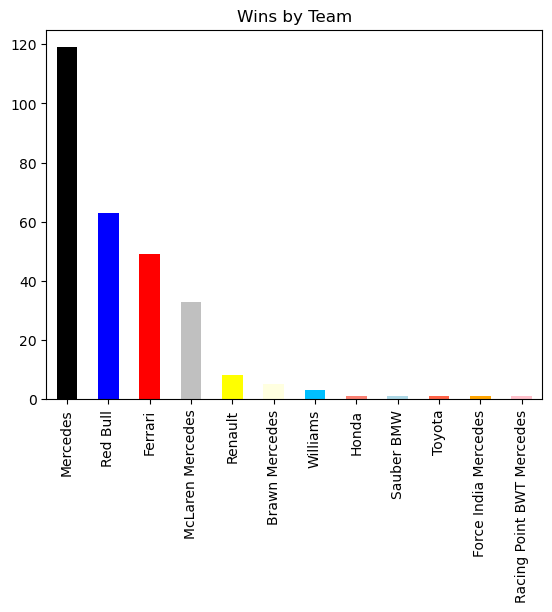

In [16]:
winsByTeam.plot(kind = 'bar', color=[color_map[x] for x in winsByTeam.index])
plt.title('Wins by Team')
plt.show()

### As we can see, there were four teams fighting for the pole position, however, one team dominated: Mercedes.

Find which driver won the most qualifications.

In [17]:
winsByDriver = winners['Name'].value_counts()

In [18]:
winsByDriver.head()

Lewis Hamilton      97
Sebastian Vettel    57
Nico Rosberg        30
Felipe Massa        16
Valtteri Bottas     16
Name: Name, dtype: int64

In [19]:
percentageWins = winsByDriver / winners['Year'].count()
percentageWins

Lewis Hamilton          0.340351
Sebastian Vettel        0.200000
Nico Rosberg            0.105263
Felipe Massa            0.056140
Valtteri Bottas         0.056140
Fernando Alonso         0.049123
Mark Webber             0.042105
Kimi Raikkonen          0.035088
Jenson Button           0.021053
Charles Leclerc         0.021053
Michael Schumacher      0.017544
Max Verstappen          0.014035
Daniel Ricciardo        0.010526
Giancarlo Fisichella    0.007018
Pastor Maldonado        0.003509
Jarno Trulli            0.003509
Nico Hulkenberg         0.003509
Rubens Barrichello      0.003509
Heikki Kovalainen       0.003509
Robert Kubica           0.003509
Lance Stroll            0.003509
Name: Name, dtype: float64

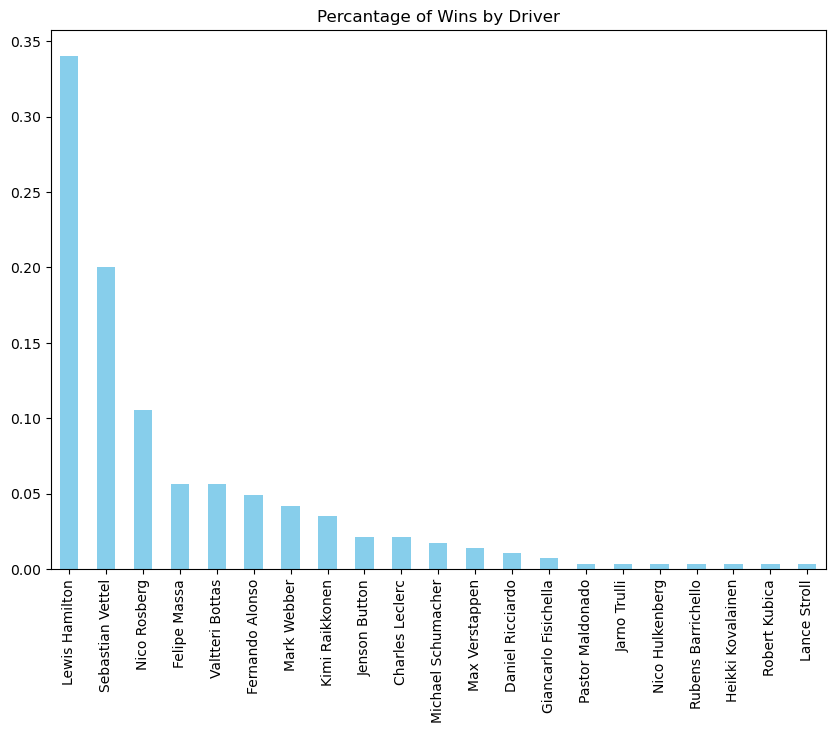

In [20]:
percentageWins.plot(kind = 'bar', color='skyblue', figsize=(10, 7))
plt.title('Percantage of Wins by Driver')
plt.show()

In [21]:
#Check the first 10 drivers' teams.
top10Drivers = winsByDriver.head(10).index.tolist()
topDriversData = winners[winners['Name'].isin(top10Drivers)]
topDriverTeams = topDriversData.groupby('Name')['Team'].agg(set).reset_index()
topDriverTeams

,Name,Team
0,Charles Leclerc,{Ferrari}
1,Felipe Massa,"{Williams, Ferrari}"
2,Fernando Alonso,"{McLaren Mercedes, Ferrari, Renault}"
3,Jenson Button,"{Honda, Brawn Mercedes, McLaren Mercedes}"
4,Kimi Raikkonen,"{Ferrari, McLaren Mercedes}"
5,Lewis Hamilton,"{Mercedes, McLaren Mercedes}"
6,Mark Webber,{Red Bull}
7,Nico Rosberg,{Mercedes}
8,Sebastian Vettel,"{Red Bull, Ferrari}"
9,Valtteri Bottas,{Mercedes}


### Let's see, and the winner is... Lewis Hamilton. If you are an F1 fan, you probably expected this result, but it is amazing that he won 97 qualification rounds out of 285.

Now, let's examine these wins.

In [22]:
LH = winners[winners['Name'] == 'Lewis Hamilton']

In [23]:
LH.head()

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
504,2007,1,canada,Lewis Hamilton,McLaren Mercedes,1:16.576,1:15.486,1:15.707
526,2007,1,united-states,Lewis Hamilton,McLaren Mercedes,1:12.563,1:12.065,1:12.331
570,2007,1,great-britain,Lewis Hamilton,McLaren Mercedes,1:19.885,1:19.400,1:19.997
702,2007,1,japan,Lewis Hamilton,McLaren Mercedes,1:25.489,1:24.753,1:25.368
724,2007,1,china,Lewis Hamilton,McLaren Mercedes,1:35.798,1:35.898,1:35.908


In [24]:
favouriteTracks = LH['Venue'].value_counts()
favouriteTracks.head()

italy            8
australia        8
great-britain    7
canada           6
china            6
Name: Venue, dtype: int64

In [25]:
LewisTeams = LH['Team'].value_counts()
LewisTeams

Mercedes            72
McLaren Mercedes    25
Name: Team, dtype: int64

In [26]:
LH[LH['Team'] == 'McLaren Mercedes']

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
504,2007,1,canada,Lewis Hamilton,McLaren Mercedes,1:16.576,1:15.486,1:15.707
526,2007,1,united-states,Lewis Hamilton,McLaren Mercedes,1:12.563,1:12.065,1:12.331
570,2007,1,great-britain,Lewis Hamilton,McLaren Mercedes,1:19.885,1:19.400,1:19.997
702,2007,1,japan,Lewis Hamilton,McLaren Mercedes,1:25.489,1:24.753,1:25.368
724,2007,1,china,Lewis Hamilton,McLaren Mercedes,1:35.798,1:35.898,1:35.908
768,2008,1,australia,Lewis Hamilton,McLaren Mercedes,1:26.572,1:25.187,1:26.714
896,2008,1,canada,Lewis Hamilton,McLaren Mercedes,1:16.909,1:17.034,1:17.886
955,2008,1,germany,Lewis Hamilton,McLaren Mercedes,1:15.218,1:14.603,1:15.666
975,2008,1,hungary,Lewis Hamilton,McLaren Mercedes,1:19.376,1:19.473,1:20.899
1015,2008,1,belgium,Lewis Hamilton,McLaren Mercedes,1:46.887,1:46.088,1:47.338


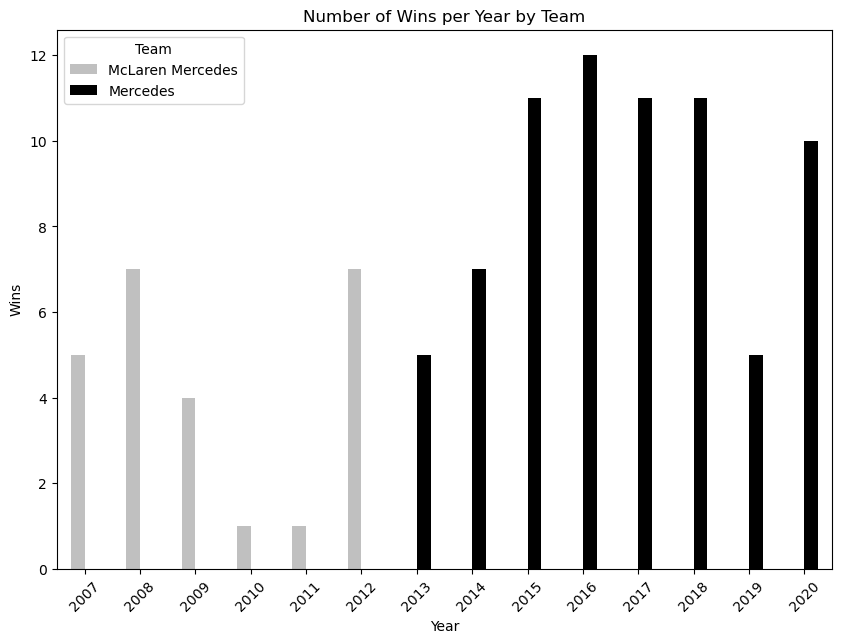

In [27]:
win_counts = LH.groupby(['Year', 'Team']).size().unstack(fill_value=0)
win_counts.plot(kind='bar',figsize=(10, 7), color=[color_map[x] for x in win_counts.columns])
plt.title('Number of Wins per Year by Team')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

### We can see that when Lewis was with McLaren, he won only 25 qualifications in 6 years. However, with Mercedes, he won 72 in 9 years!

In [28]:
# now check Q3 lap times
winners.head()

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
0,2006,1,bahrain,Michael Schumacher,Ferrari,1:33.310,1:32.025,1:31.431
22,2006,1,malaysia,Giancarlo Fisichella,Renault,1:35.488,1:33.623,1:33.840
44,2006,1,australia,Jenson Button,Honda,1:28.081,1:26.337,1:25.229
66,2006,1,san-marino,Michael Schumacher,Ferrari,1:24.598,1:22.579,1:22.795
88,2006,1,europe,Fernando Alonso,Renault,1:31.138,1:30.336,1:29.819


In [29]:
print(winners['Q3'].unique())

['1:31.431' '1:33.840' '1:25.229' '1:22.795' '1:29.819' '1:14.648'
 '1:13.962' '1:20.253' '1:14.942' '1:10.832' '1:15.493' '1:14.070'
 '1:19.599' '1:26.907' '1:21.484' '1:44.360' '1:29.599' '1:10.680'
 '1:26.072' '1:35.043' '1:32.652' '1:21.421' '1:15.726' '1:15.707'
 '1:12.331' '1:15.034' '1:19.997' '1:31.450' '1:19.674' '1:27.329'
 '1:21.997' '1:45.994' '1:25.368' '1:35.908' '1:11.931' '1:26.714'
 '1:35.748' '1:33.096' '1:21.813' '1:27.617' '1:15.787' '1:17.886'
 '1:16.449' '1:21.049' '1:15.666' '1:20.899' '1:38.989' '1:47.338'
 '1:37.555' '1:44.801' '1:18.404' '1:36.303' '1:12.368' '1:26.202'
 '1:35.181' '1:36.184' '1:33.431' '1:20.527' '1:14.902' '1:28.316'
 '1:19.509' '1:32.230' '1:21.569' '1:39.498' '1:46.308' '1:24.066'
 '1:47.891' '1:32.160' '1:19.576' '1:40.948' '1:54.101' '1:23.919'
 '1:49.327' '1:34.558' '1:19.995' '1:13.826' '1:26.295' '1:15.105'
 '1:37.587' '1:29.615' '1:13.791' '1:18.773' '1:45.778' '1:21.962'
 '1:45.390' '1:30.785' '1:35.585' '1:14.470' '1:39.394' '1:23.

In [30]:
#we can drop Valtteri from 2020 becasue it was shorter track
winners = winners.drop(6049)

In [31]:
winners[winners['Q3'].isnull()]

,Year,Position,Venue,Name,Team,Q1,Q2,Q3
3978,2015,1,united-states,Nico Rosberg,Mercedes,1:56.671,1:56.824,NaN


In [32]:
winners.loc[winners['Q3'].isnull(), 'Q3'] = winners.loc[winners['Q3'].isnull(), 'Q2']

In [33]:
def time_to_seconds(time):
    time_str = str(time)
    minutes, seconds = time_str.split(':')
    seconds, milliseconds = seconds.split('.')

    minutes = int(minutes)
    seconds = int(seconds)
    milliseconds = int(milliseconds)

    total_seconds = (minutes * 60) + seconds + (milliseconds / 1000)
    
    return total_seconds

In [34]:
winners['Q3InSeconds'] = winners['Q3'].apply(time_to_seconds)
winners

,Year,Position,Venue,Name,Team,Q1,Q2,Q3,Q3InSeconds
0,2006,1,bahrain,Michael Schumacher,Ferrari,1:33.310,1:32.025,1:31.431,91.431
22,2006,1,malaysia,Giancarlo Fisichella,Renault,1:35.488,1:33.623,1:33.840,93.840
44,2006,1,australia,Jenson Button,Honda,1:28.081,1:26.337,1:25.229,85.229
66,2006,1,san-marino,Michael Schumacher,Ferrari,1:24.598,1:22.579,1:22.795,82.795
88,2006,1,europe,Fernando Alonso,Renault,1:31.138,1:30.336,1:29.819,89.819
...,...,...,...,...,...,...,...,...,...
5969,2020,1,portugal,Lewis Hamilton,Mercedes,1:16.828,1:16.824,1:16.652,76.652
5989,2020,1,italy,Valtteri Bottas,Mercedes,1:14.221,1:14.585,1:13.609,73.609
6009,2020,1,turkey,Lance Stroll,Racing Point BWT Mercedes,2:07.467,1:53.372,1:47.765,107.765
6029,2020,1,bahrain,Lewis Hamilton,Mercedes,1:28.343,1:27.586,1:27.264,87.264


In [35]:
topVenues = winners['Venue'].value_counts()
top10Venues = topVenues.head(10).index.tolist()
topVenuesData = winners[winners['Venue'].isin(top10Venues)]

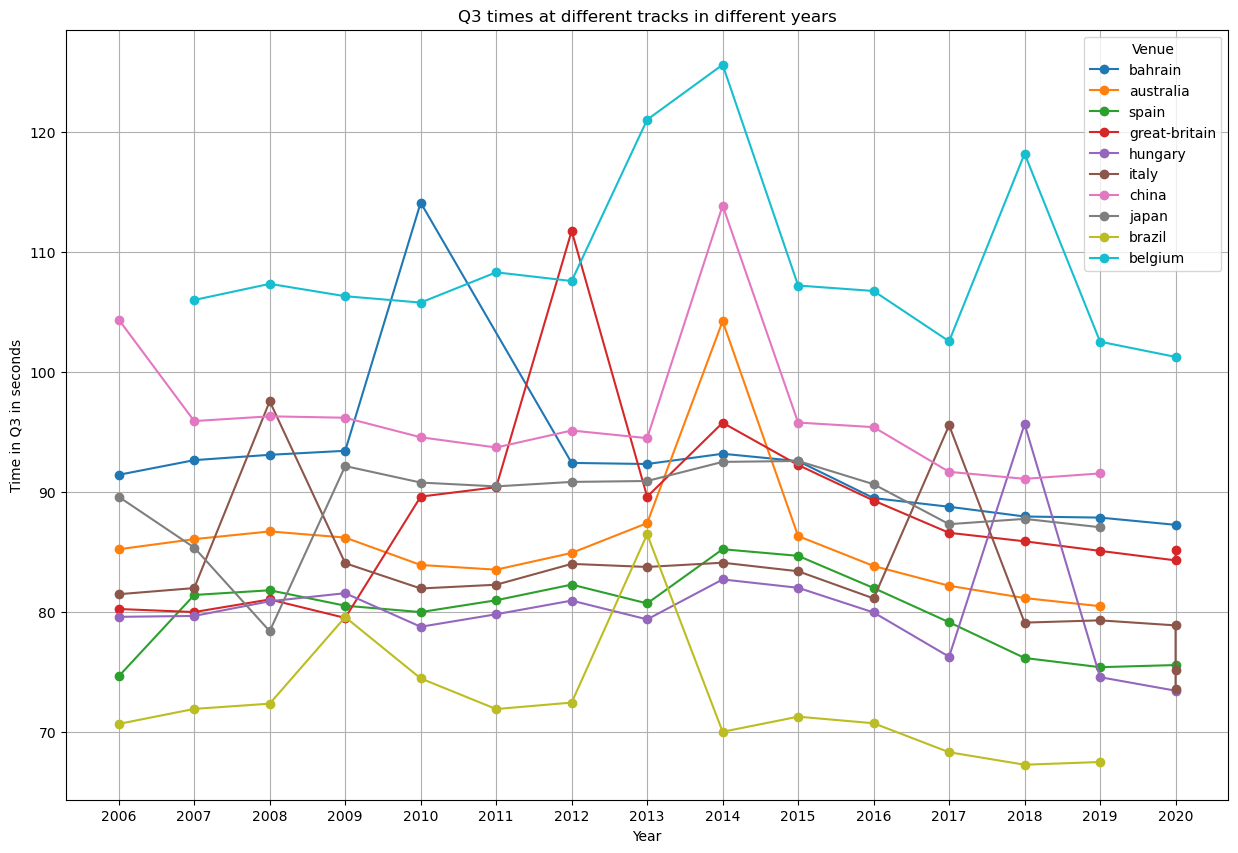

In [36]:
#Show only the top 10 tracks according to their occurrences.
plt.figure(figsize=(15, 10))

for venue in topVenuesData['Venue'].unique():
    track_data = winners[winners['Venue'] == venue]
    plt.plot(track_data['Year'], track_data['Q3InSeconds'], marker='o', linestyle='-', label=venue)

plt.title('Q3 times at different tracks in different years')
plt.xlabel('Year')
plt.ylabel('Time in Q3 in seconds')
plt.legend(title='Venue')
plt.grid(True)
plt.xticks(sorted(winners['Year'].unique()))
plt.show()

### It's difficult to analyze because tracks change over the years, and there were new car regulations in 2010 and 2015.
### Also, we don't know if it was sunny or raining, but we can clearly see that newer cars are faster than the older ones.